In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [48]:
col_names=['variance of Wavelet Transformed image', 'skewness of Wavelet Transformed image', 'curtosis of Wavelet Transformed image', 'entropy of image', 'class']

data=pd.read_csv('banknote1.csv',header=None,names=col_names)

In [49]:
data

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [50]:
data.shape

(1372, 5)

In [51]:
data.head()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [52]:
data.tail()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [53]:
data.dtypes

variance of Wavelet Transformed image    float64
skewness of Wavelet Transformed image    float64
curtosis of Wavelet Transformed image    float64
entropy of image                         float64
class                                      int64
dtype: object

In [54]:
data.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

In [55]:
#as there are no null values

In [56]:
data.describe()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance of Wavelet Transformed image    1372 non-null float64
skewness of Wavelet Transformed image    1372 non-null float64
curtosis of Wavelet Transformed image    1372 non-null float64
entropy of image                         1372 non-null float64
class                                    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


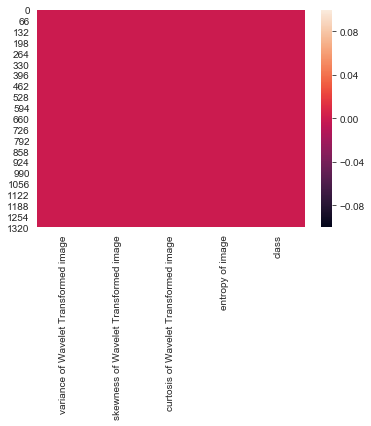

In [58]:
sns.heatmap(data.isnull())

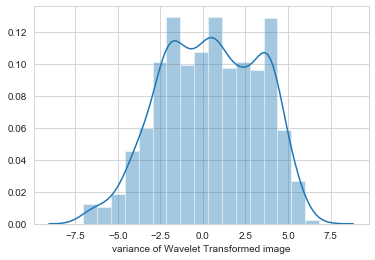

In [59]:
sns.distplot(data['variance of Wavelet Transformed image'])

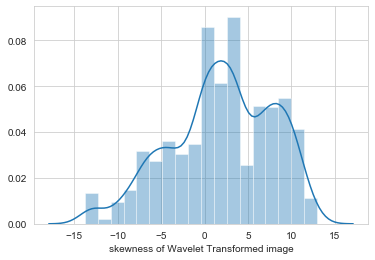

In [60]:
sns.distplot(data['skewness of Wavelet Transformed image'])

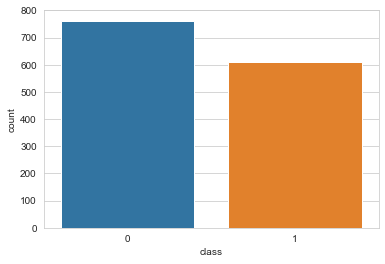

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=data)

In [62]:
collist=data.columns.values
ncol=9
nrows=10

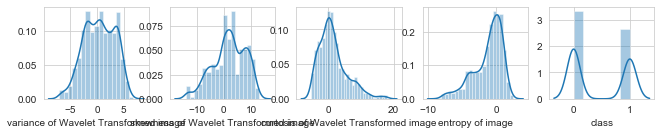

In [63]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(data[collist[i]])

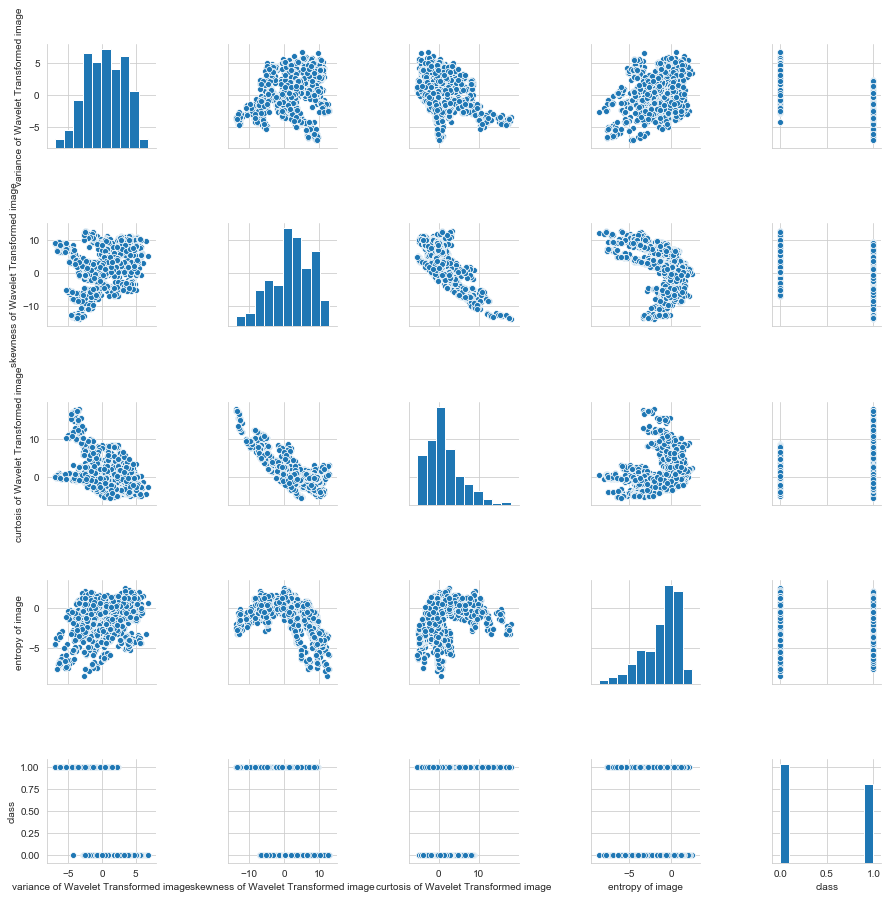

In [64]:
sns.pairplot(data)

In [65]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135, 0.89472059],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744, 0.89472059],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317, 0.89472059],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418, 1.11766736],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848, 1.11766736],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 , 1.11766736]])

In [66]:
threshold=3
print(np.where(z>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int64))


In [67]:
z[45][3]

3.005238198611928

In [68]:
z[194][3]

3.0434241775405813

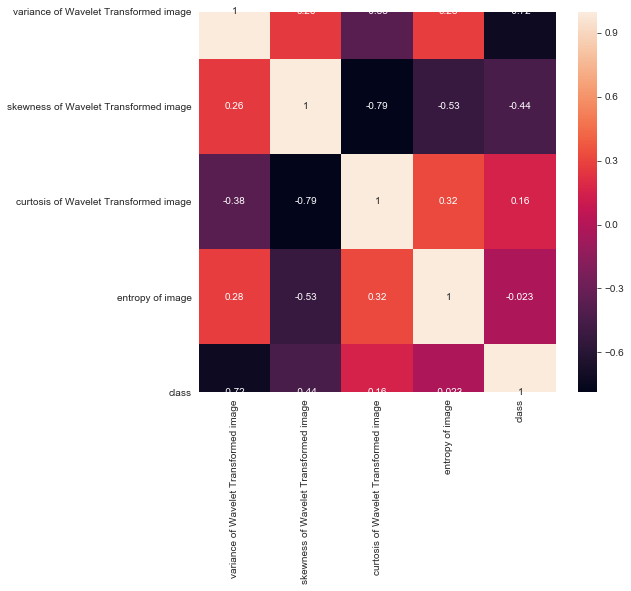

In [69]:
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

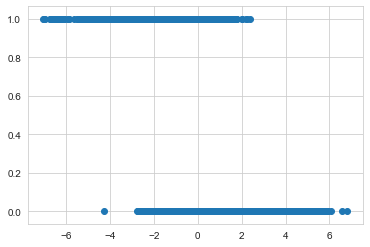

In [70]:
plt.scatter(data['variance of Wavelet Transformed image'],data['class'])
plt.show()

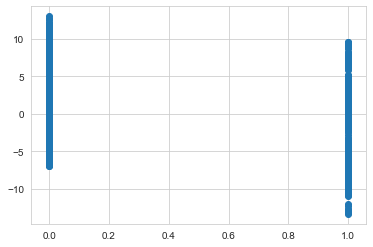

In [77]:
x=data['class']
y=data['skewness of Wavelet Transformed image']
plt.scatter(x,y)
plt.show()

In [71]:
data_new=data[(z<3).all(axis=1)]

In [72]:
data_new

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1
1370,-3.56370,-8.38270,12.39300,-1.28230,1


In [73]:
data_new.shape

(1336, 5)

In [74]:
data.shape

(1372, 5)

In [75]:
data=data_new

In [76]:
data.shape

(1336, 5)

In [79]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [80]:
x.shape

(1336, 4)

In [81]:
y.shape

(1336,)

In [82]:
x.head()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [83]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [84]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=52)

In [87]:
x_train.shape

(1042, 4)

In [88]:
y_train.shape

(1042,)

In [89]:
x_test.shape

(294, 4)

In [90]:
y_test.shape

(294,)

In [91]:
lg=LogisticRegression()

In [92]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.9829931972789115
[[168   5]
 [  0 121]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       173
           1       0.96      1.00      0.98       121

    accuracy                           0.98       294
   macro avg       0.98      0.99      0.98       294
weighted avg       0.98      0.98      0.98       294



In [94]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8299319727891157
[[142  31]
 [ 19 102]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       173
           1       0.77      0.84      0.80       121

    accuracy                           0.83       294
   macro avg       0.82      0.83      0.83       294
weighted avg       0.83      0.83      0.83       294



In [95]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9863945578231292
[[169   4]
 [  0 121]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       173
           1       0.97      1.00      0.98       121

    accuracy                           0.99       294
   macro avg       0.98      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



In [96]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9829931972789115
[[170   3]
 [  2 119]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       173
           1       0.98      0.98      0.98       121

    accuracy                           0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294



In [99]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9965986394557823
[[172   1]
 [  0 121]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       173
           1       0.99      1.00      1.00       121

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9863945578231292
[[170   3]
 [  1 120]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       173
           1       0.98      0.99      0.98       121

    accuracy                           0.99       294
   macro avg       0.98      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



In [102]:
#here knn gives the best accuracy_score